In [37]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ticker = ["AAPL", "BA", "KO", "IBM", "DIS", "MSFT"]


* Downloading 1 year of finacial data for tickers

In [4]:
stocks = yf.download(ticker, start="2010-01-01", end="2020-01-01")

[*********************100%***********************]  6 of 6 completed


In [5]:
stocks.head(3)


Adj Close                                                         \
                AAPL         BA        DIS        IBM         KO       MSFT   
Date                                                                          
2009-12-31  6.434924  42.180103  28.090708  82.345879  19.483231  23.438797   
2010-01-04  6.535086  43.777550  27.933922  83.320961  19.496904  23.800230   
2010-01-05  6.546384  45.211346  27.864237  82.314438  19.261053  23.807909   

               Close                                ...   Open              \
                AAPL         BA    DIS         IBM  ...    DIS         IBM   
Date                                                ...                      
2009-12-31  7.526071  54.130001  32.25  125.143402  ...  32.27  126.586998   
2010-01-04  7.643214  56.180000  32.07  126.625237  ...  32.50  125.411087   
2010-01-05  7.656429  58.020000  31.99  125.095604  ...  32.07  125.889099   

                                     Volume                              \
                   KO       MSFT       AAPL       BA       DIS      IBM   
Date                                                                      
2009-12-31  28.790001  30.980000  352410800  2189400  19651700  4417676   
2010-01-04  28.580000  30.620001  493729600  6186700  13700400  6438444   
2010-01-05  28.424999  30.850000  601904800  8867800  10307700  7156104   

                                
                  KO      MSFT  
Date                            
2009-12-31  10848800  31929700  
2010-01-04  13870400  38409100  
2010-01-05  23172400  49749600  

[3 rows x 36 columns]

In [6]:
stocks.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2009-12-31 to 2019-12-31
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2517 non-null   float64
 1   (Adj Close, BA)    2517 non-null   float64
 2   (Adj Close, DIS)   2517 non-null   float64
 3   (Adj Close, IBM)   2517 non-null   float64
 4   (Adj Close, KO)    2517 non-null   float64
 5   (Adj Close, MSFT)  2517 non-null   float64
 6   (Close, AAPL)      2517 non-null   float64
 7   (Close, BA)        2517 non-null   float64
 8   (Close, DIS)       2517 non-null   float64
 9   (Close, IBM)       2517 non-null   float64
 10  (Close, KO)        2517 non-null   float64
 11  (Close, MSFT)      2517 non-null   float64
 12  (High, AAPL)       2517 non-null   float64
 13  (High, BA)         2517 non-null   float64
 14  (High, DIS)        2517 non-null   float64
 15  (High, IBM)        2517 non-null   float64
 16  (High,

* Saving the dataframe to CSV file

In [7]:
stocks.to_csv("stocks.csv")


* just cheking the dataset and making a graph

In [8]:
close = stocks.loc[:, "Close"].copy()


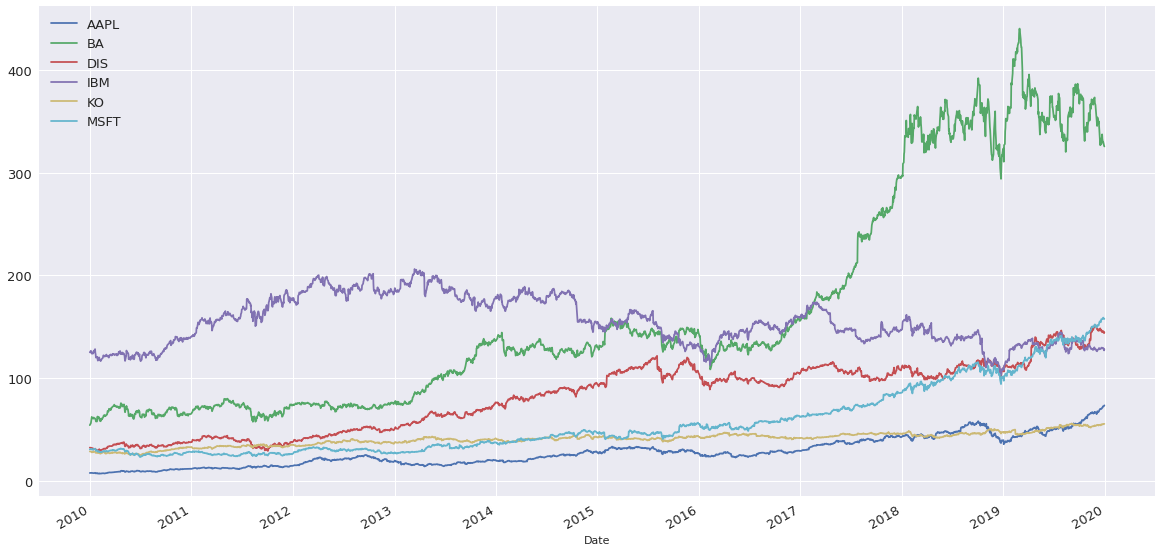

In [9]:
plt.style.use("seaborn")
close.plot(figsize=(20,10), fontsize=13)
plt.legend(fontsize=13)
plt.show()

* it's hard to analyze data as every stock has different value for start, so i'm Normalizing these values to base value(100)

* deviding every column value with the first column value and multiplying it with 100

In [10]:
norm_df = close.div(close.iloc[0]).mul(100)


* Now every value is starting from the same point

In [11]:
norm_df.head(3)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2009-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-04,101.556498,103.787178,99.441860,101.184109,100.070177,101.541999
2010-01-05,101.732082,107.186402,99.193798,99.961805,98.859646,101.574802


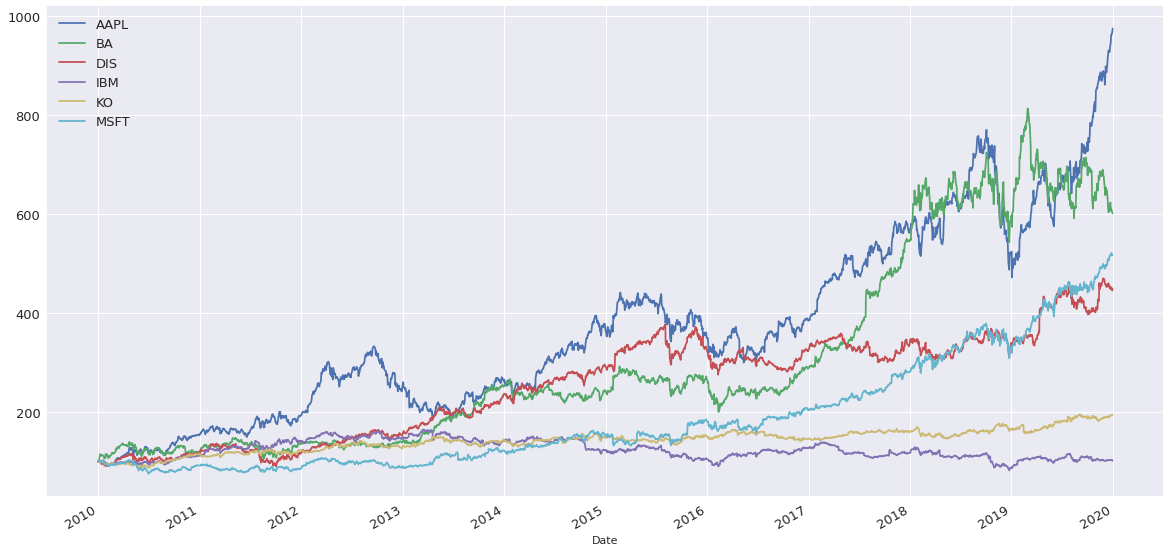

In [12]:
norm_df.plot(figsize=(20,10), fontsize=13)
plt.legend(fontsize=13)
plt.show()

* calculating daily increase and decrease of stock performance

In [14]:
aapl = close.AAPL.copy().to_frame()

* shifting the stock value down by 1 and saving it in the new column so we can measure the daily change by comparing original and shifted column

In [21]:
aapl['shifted'] = aapl.shift(periods=1)

ValueError: Expected a 1D array, got an array with shape (2517, 2)

In [22]:
aapl['Difference'] = aapl.AAPL.sub(aapl.Shifted)

In [23]:
aapl.head(3)

,AAPL,Shifted,Difference
Date,,,
2009-12-31,7.526071,NaN,NaN
2010-01-04,7.643214,7.526071,0.117143
2010-01-05,7.656429,7.643214,0.013215


* calculating the difference in percentage

In [28]:
aapl["pct_change"] = aapl.AAPL.div(aapl.Shifted).sub(1).mul(100)

In [29]:
aapl.head()

,AAPL,Shifted,Difference,pct_change
Date,,,,
2009-12-31,7.526071,NaN,NaN,NaN
2010-01-04,7.643214,7.526071,0.117143,1.556498
2010-01-05,7.656429,7.643214,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.184871


2. Calculating stock performance with mean and std returns

In [38]:
aapl = close.AAPL.copy().to_frame()


In [41]:
ret = aapl.pct_change().dropna()


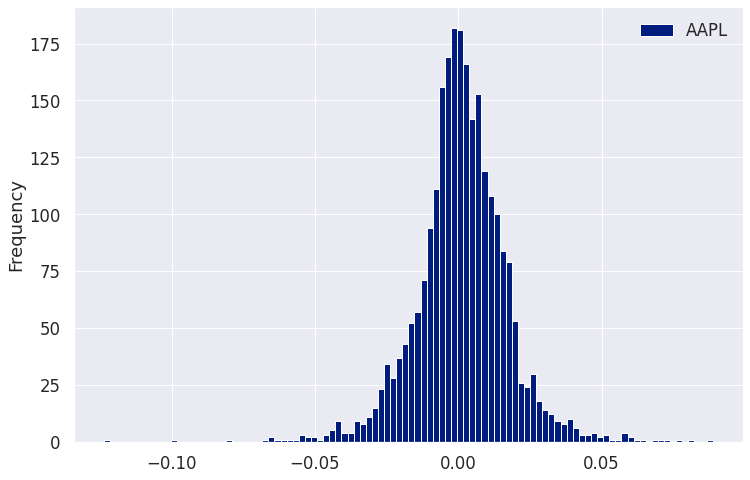

In [42]:
ret.plot(kind="hist", figsize=(12, 8), bins=100)
plt.show()


* daily return

In [43]:
daily_mean_Return = ret.mean()*100
daily_mean_Return


AAPL    0.103764
dtype: float64

* annual return

In [45]:
ann_mean_Return = ret.mean() * 252*100
# multiplied with 252 insted of 365 because in average we have 252 days of active trading
ann_mean_Return


AAPL    26.148585
dtype: float64

3. Return and Risk

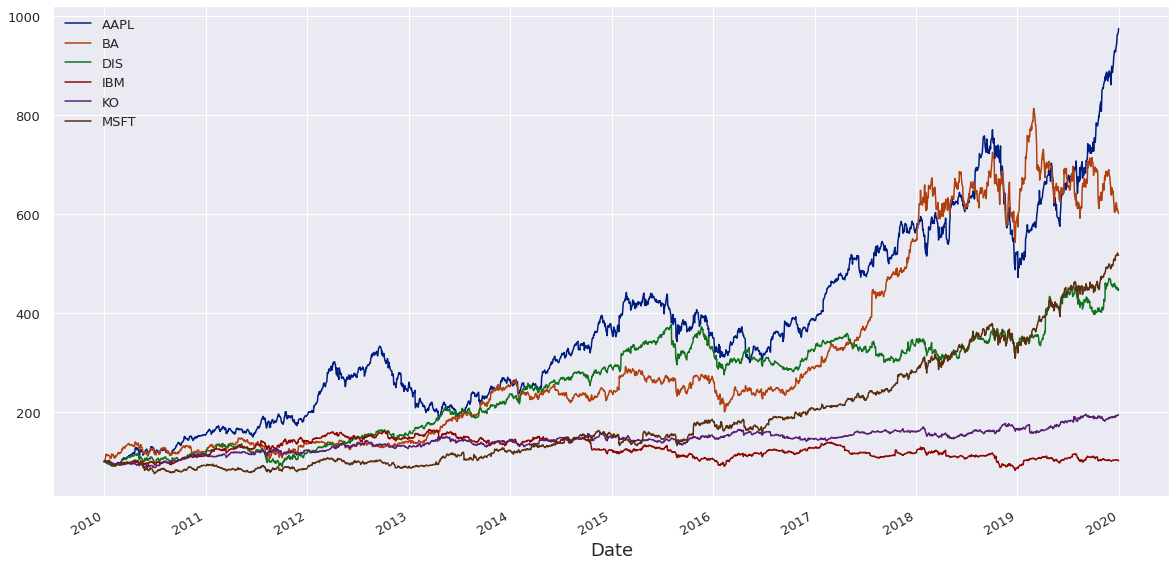

In [47]:
norm_df.plot(figsize=(20, 10), fontsize=13)
plt.legend(fontsize=13)
plt.show()


* calculating change of value in percentage for every stock

In [50]:
ret = close.pct_change().dropna()

In [52]:
ret.describe()

,AAPL,BA,DIS,IBM,KO,MSFT
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.001038,0.000837,0.000685,0.000086,0.000308,0.000756
std,0.016233,0.015704,0.013276,0.012384,0.009366,0.014334
min,-0.123558,-0.089290,-0.091708,-0.082790,-0.084354,-0.113995
25%,-0.006913,-0.007535,-0.005836,-0.005990,-0.004524,-0.006665
50%,0.000895,0.000878,0.000760,0.000287,0.000442,0.000531
75%,0.009797,0.009522,0.007514,0.006480,0.005513,0.008204
max,0.088741,0.098795,0.115437,0.088645,0.060718,0.104522


In [53]:
summary = ret.describe().T.loc[:, ["mean", "std"]]

In [54]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)


* we can see in the grapf, higher risk as higher return.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


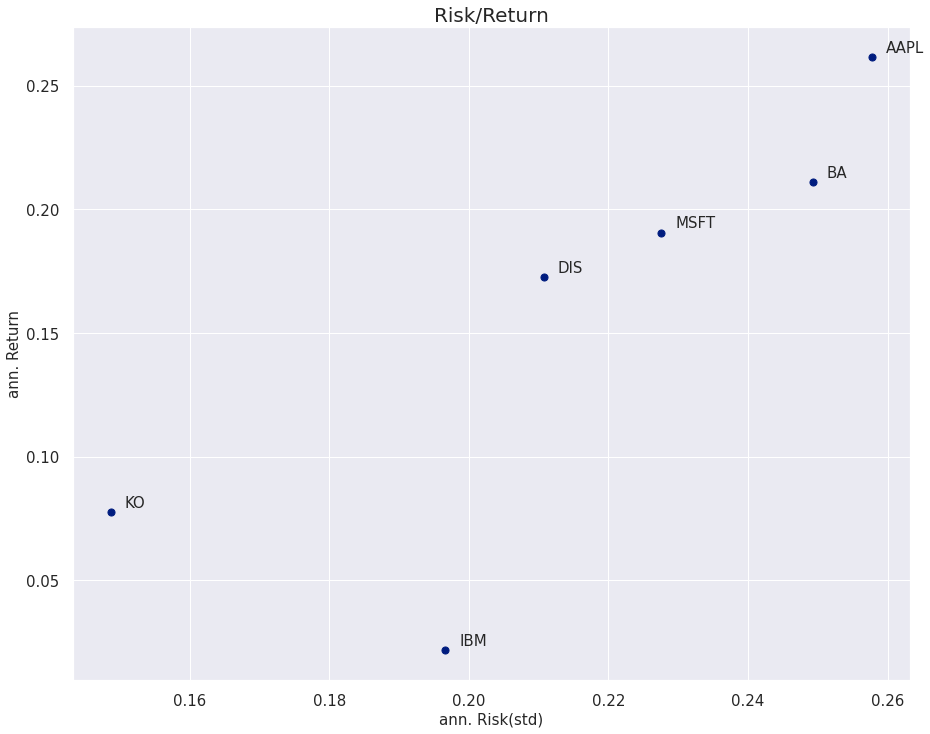

In [55]:
summary.plot(kind="scatter", x="std", y="mean",
             figsize=(15, 12), s=50, fontsize=15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002,
                 summary.loc[i, "mean"]+0.002), size=15)
plt.xlabel("ann. Risk(std)", fontsize=15)
plt.ylabel("ann. Return", fontsize=15)
plt.title("Risk/Return", fontsize=20)
plt.show()
